Práctica 3 parte 1
Manuela Santamaria
Andrés Felipe Agudelo
Omar Santiago Acevedo

Inicialmente se importan las librerias adecuadas para proporcionar herramientas necesarias en el procesamiento, análisis y visualización de las señales ECG que se quieren analizar. Luego, se mplementa una función que permita calcular el valor cuadrático medio (RMS) de una señal. A partir de la información suministrada en el archivo .mat, se determina el tiempo de duración de las señales, se crea un vector de tiempo. Por último, se grafica la señal sin filtrar y filtrada

Duración de la señal: 30.00 segundos
Tamaño del vector de tiempo: 30720 muestras


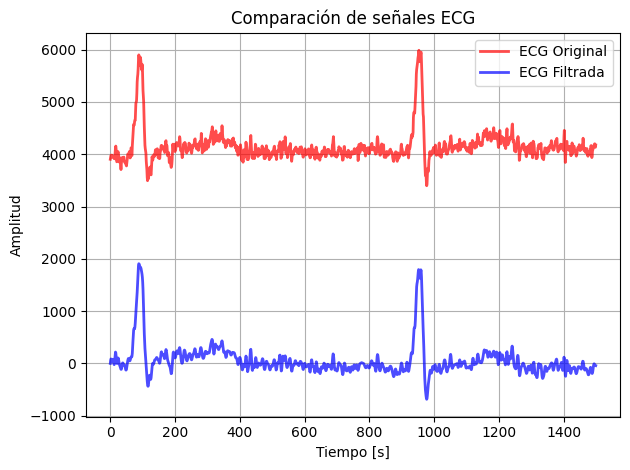

In [ ]:
import numpy as np

def calcular_rms(signal):
    N = len(signal)
    rms = np.sqrt(np.sum(np.square(signal)) / N)
    return rms

import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu


# --- 1. Cargar datos ---
data = sio.loadmat('signals.mat')
archivo = scipy.io.loadmat('signals.mat')

# Extraer la señal ECG registrada
ecg_asRecording = archivo['ECG_asRecording'].flatten()  # Señal ECG sin filtrar

# Frecuencia de muestreo
fs = 1024  # Hz

# Número de muestras
num_muestras = len(ecg_asRecording)

# Calcular la duración en segundos
duracion_seg = num_muestras / fs

# Crear el vector de tiempo
tiempo = np.linspace(0, duracion_seg, num_muestras)

print(f"Duración de la señal: {duracion_seg:.2f} segundos")
print(f"Tamaño del vector de tiempo: {len(tiempo)} muestras")

plt.plot(ecg_asRecording[:n_puntos], label='ECG Original', linewidth=2, color='red', alpha=0.7)
plt.plot(ecg_filtered[:n_puntos], label='ECG Filtrada', linewidth=2, color='blue', alpha=0.7)
plt.title("Comparación de señales ECG")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()




Se toma la señal tal cual se registró. De dicha señal, se selecciona un ciclo cardiaco, se grafica. Además, se calcula el promedio, el valor RMS, la varianza y la desviación estándar del ciclo.

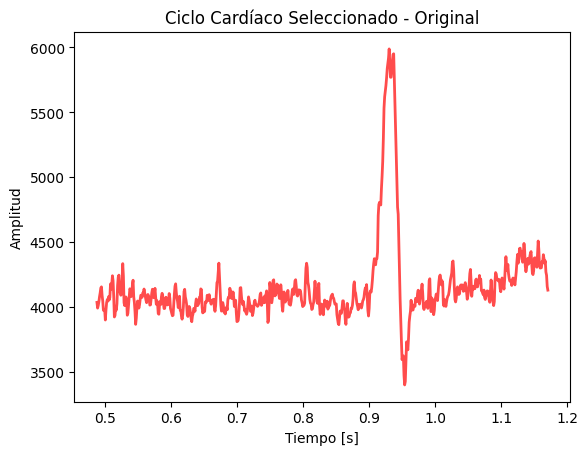

Promedio del ciclo: 4148.6782599748885
Valor RMS del ciclo: 4161.326979663616
Varianza del ciclo: 105110.92688803967
Desviación estándar del ciclo: 324.2081536421311


In [ ]:
archivo = scipy.io.loadmat('signals.mat')

# Extraer la señal ECG registrada
ecg_asRecording = archivo['ECG_asRecording'].flatten()  # Señal ECG sin filtrar

# Seleccionar un ciclo cardíaco manualmente
inicio = 500  # Índice de inicio
final = 1200   # Índice de fin

ecg_ciclo = ecg_asRecording[inicio:final]  # Acceder a la señal en el instante deseado
t_ciclo = tiempo[inicio:final]

# Graficar el ciclo seleccionado
plt.plot(t_ciclo, ecg_ciclo, linewidth=2, color='red', alpha=0.7)
plt.title('Ciclo Cardíaco Seleccionado - Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.show()

# Cálculo de estadísticas del ciclo
promedio = np.mean(ecg_ciclo)
rms = calcular_rms(ecg_ciclo)
varianza = np.var(ecg_ciclo)
desviacion_estandar = np.std(ecg_ciclo)

# Mostrar estadísticas del ciclo
print(f"Promedio del ciclo: {promedio}")
print(f"Valor RMS del ciclo: {rms}")
print(f"Varianza del ciclo: {varianza}")
print(f"Desviación estándar del ciclo: {desviacion_estandar}")

1. En cuanto al promedio del ciclo que arroja un valor de 4148.68 se observa que se obtiene un valor alto, lo que confirma el componente DC tan fuerte. Es por esto que el ciclo está sobre un valor diferente a cero.

2. El valor RMS de 4161.32 es un poco superior al promedio y nos indica que la mayor parte de la magnitud de la señal en el ciclo proviene de su componente DC mencionada en 1.

3. Por último, es valor de la varianza (105110.93) es un valor alto y esto se debe a las grandes deflexiones de la señal, sobre todo en el complejo RQS, además de el ruido de la señal.

Se toma la señal filtrada y se repite el procedimiento anterior con esta señal.

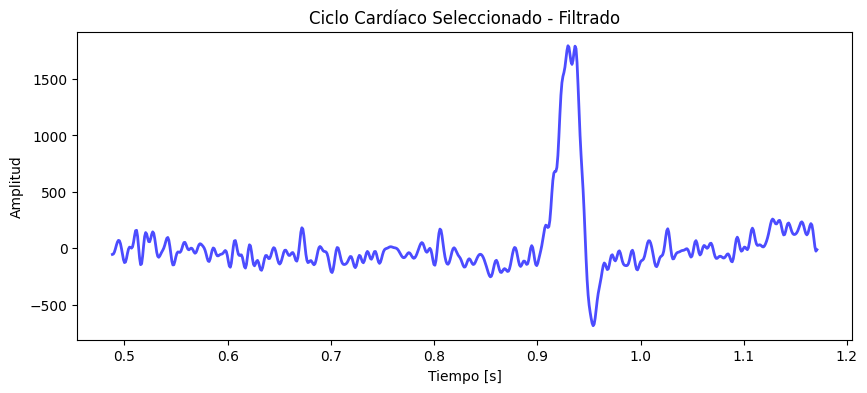

Promedio del ciclo (filtrado): 19.582181932193542
Valor RMS del ciclo (filtrado): 315.3546170327259
Varianza del ciclo (filtrado): 99065.07263463167
Desviación estándar del ciclo (filtrado): 314.7460446687641


In [ ]:
archivo = scipy.io.loadmat('signals.mat')

# Extraer las señales
ecg_filtered = archivo['ECG_filtered'].flatten()  # Señal ECG filtrada

# Seleccionar un ciclo cardíaco manualmente
inicio = 500  # Índice de inicio
final = 1200   # Índice de fin

ecg_ciclo = ecg_filtered[inicio:final]  # Acceder a la señal en el instante deseado
t_ciclo = tiempo[inicio:final]  # Usar el vector de tiempo ya creado

# Graficar el ciclo seleccionado
plt.figure(figsize=(10, 4))
plt.plot(t_ciclo, ecg_ciclo, linewidth=2, color='blue', alpha=0.7)
plt.title('Ciclo Cardíaco Seleccionado - Filtrado')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.show()

# Cálculo de estadísticas del ciclo
promedio = np.mean(ecg_ciclo)
rms = calcular_rms(ecg_ciclo)
varianza = np.var(ecg_ciclo)
desviacion_estandar = np.std(ecg_ciclo)

# Mostrar estadísticas del ciclo
print(f"Promedio del ciclo (filtrado): {promedio}")
print(f"Valor RMS del ciclo (filtrado): {rms}")
print(f"Varianza del ciclo (filtrado): {varianza}")
print(f"Desviación estándar del ciclo (filtrado): {desviacion_estandar}")

•	Promedio del ciclo: 19.58.
Este valor es cercano a cero, lo que confirma la eliminación efectiva de la componente DC.

•	Valor RMS del ciclo: 315.35.
Ahora que la componente DC casi ha desaparecido, el valor RMS refleja mucho.

•	Varianza del ciclo: 99065.07.
disminuyó, pero no tanto como el promedio o el RMS. Esto se debe a que la gran amplitud del QRS  sigue presente. La reducción se debe principalmente a la eliminación de la potencia del ruido de alta frecuencia.

•	Desviación estándar del ciclo: 314.75.
Se redujo ligeramente, indicando que la dispersión principal la causa el propio QRS. (~19.58).


Se extraen 15 ciclos de la señal filtrada, y para cada ciclo se calcula el valor promedio y la varianza, además, se grafica cada ciclo.

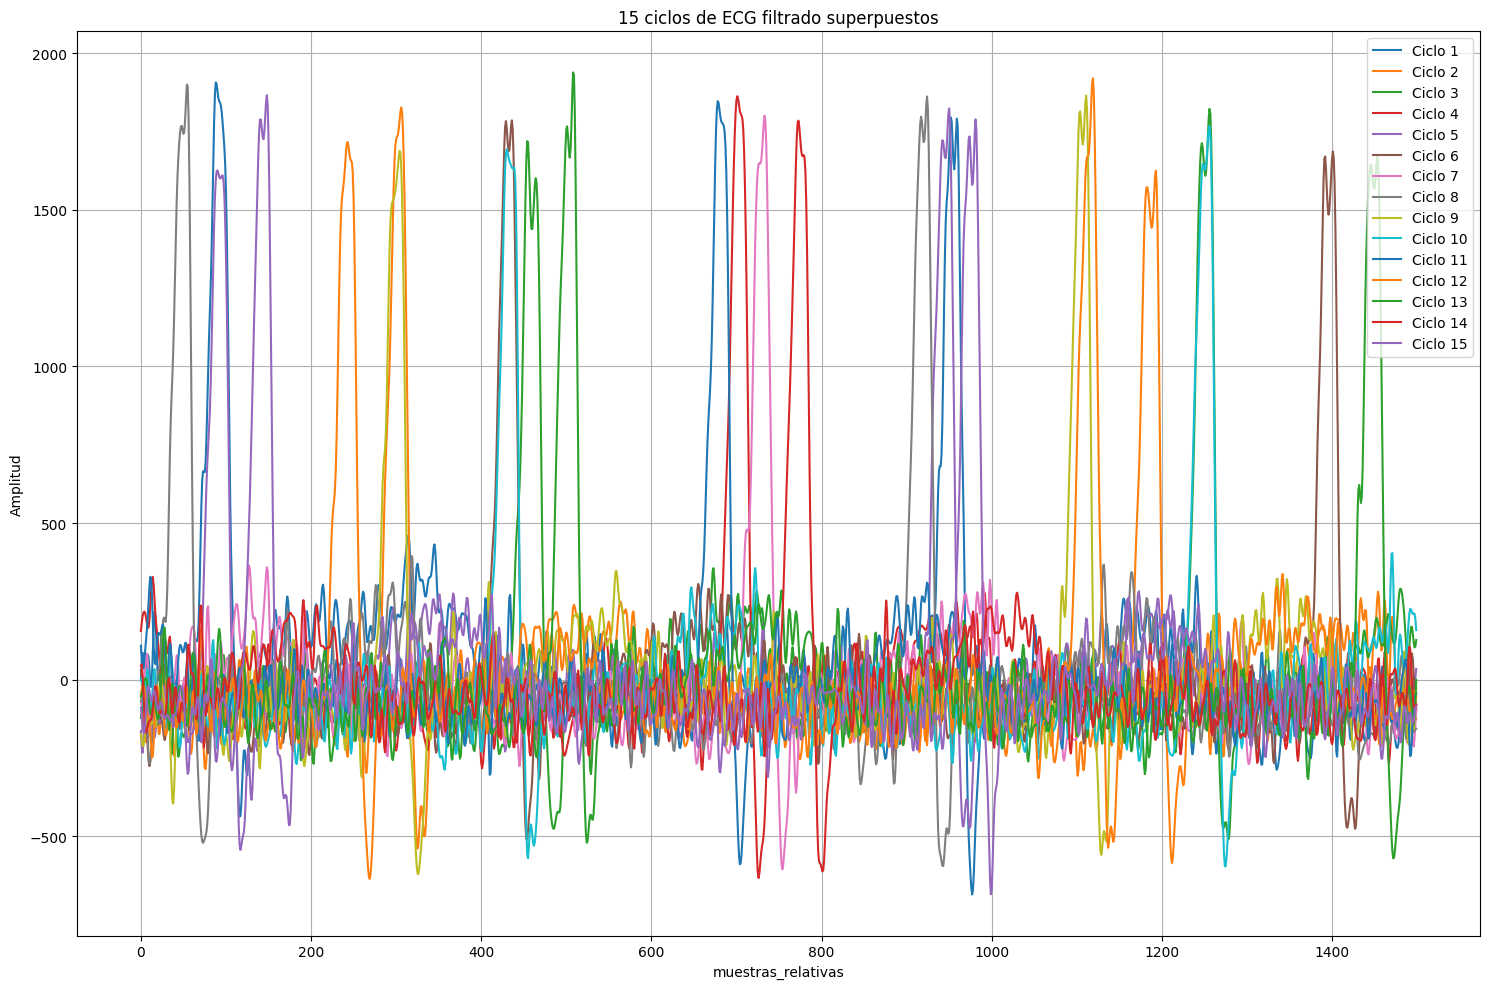


Estadísticas por ciclo:
Ciclo 1: Valor Promedio = 57.4984, Varianza = 102395.3246
Ciclo 2: Valor Promedio = -3.9515, Varianza = 88715.8757
Ciclo 3: Valor Promedio = 12.7501, Varianza = 89186.8276
Ciclo 4: Valor Promedio = -28.4831, Varianza = 54710.7920
Ciclo 5: Valor Promedio = 17.5480, Varianza = 85948.2766
Ciclo 6: Valor Promedio = -2.2233, Varianza = 87320.4082
Ciclo 7: Valor Promedio = -15.7914, Varianza = 51303.6475
Ciclo 8: Valor Promedio = 8.3102, Varianza = 100125.4100
Ciclo 9: Valor Promedio = 18.5009, Varianza = 90749.3432
Ciclo 10: Valor Promedio = -10.6955, Varianza = 90327.3046
Ciclo 11: Valor Promedio = -6.3088, Varianza = 53295.9117
Ciclo 12: Valor Promedio = 12.5600, Varianza = 91333.7982
Ciclo 13: Valor Promedio = -7.8773, Varianza = 90830.0654
Ciclo 14: Valor Promedio = -8.3923, Varianza = 50656.8658
Ciclo 15: Valor Promedio = 6.4695, Varianza = 92558.5100


In [ ]:
ciclo_duracion_muestras = 1500
n_ciclos = 15

promedios = []
varianzas = []

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 10))

# Eje X
muestras_relativas = np.arange(ciclo_duracion_muestras)

# Iterar para extraer, calcular estadísticas y graficar en los mismos ejes
for i in range(n_ciclos):
    inicio = i * ciclo_duracion_muestras
    final = inicio + ciclo_duracion_muestras

    # Extraer el segmento del ciclo
    ecg_ciclo = ecg_filtered[inicio:final]

    # Asegurarse de que el ciclo tiene la longitud esperada (importante si está al final de la señal)
    if len(ecg_ciclo) == ciclo_duracion_muestras:
        # Calcular estadísticas
        promedio = np.mean(ecg_ciclo)
        varianza = np.var(ecg_ciclo)
        promedios.append(promedio)
        varianzas.append(varianza)

        # Graficar el ciclo en los ejes 'ax' con una etiqueta
        ax.plot(muestras_relativas, ecg_ciclo, label=f'Ciclo {i+1}')
    else:
        print(f"Advertencia: El ciclo {i+1} no pudo ser extraído completamente (longitud {len(ecg_ciclo)}). Se omitirá.")

# Configurar la gráfica
ax.set_title(f'{n_ciclos} ciclos de ECG filtrado superpuestos')
ax.set_xlabel('muestras_relativas') # Eje X ahora son muestras relativas
ax.set_ylabel('Amplitud')
ax.grid(True)
ax.legend() # Mostrar la leyenda con las etiquetas de cada ciclo
plt.tight_layout() # Ajustar para que no se solapen elementos
plt.show() # Mostrar la gráfica

# Imprimir las estadísticas calculadas
print("\nEstadísticas por ciclo:")
for i in range(len(promedios)): # Usar len(promedios) por si algún ciclo se omitió
    print(f"Ciclo {i+1}: Valor Promedio = {promedios[i]:.4f}, Varianza = {varianzas[i]:.4f}")



Valores Promedio: Los valores no son constantes. Esto debido a que la media de la señal no es la misma para cada latido cardíaco en este segmento.

Valores de Varianza: Los valores varían considerablemente entre los ciclos. Esto se debe a que la dispersión de los datos alrededor de la media varía significativamente de un latido a otro. Esto refleja directamente las diferencias de amplitud observadas visualmente en la gráfica. Ciclos con QRS más grandes o mayor fluctuación de línea base tendrán mayor varianza.

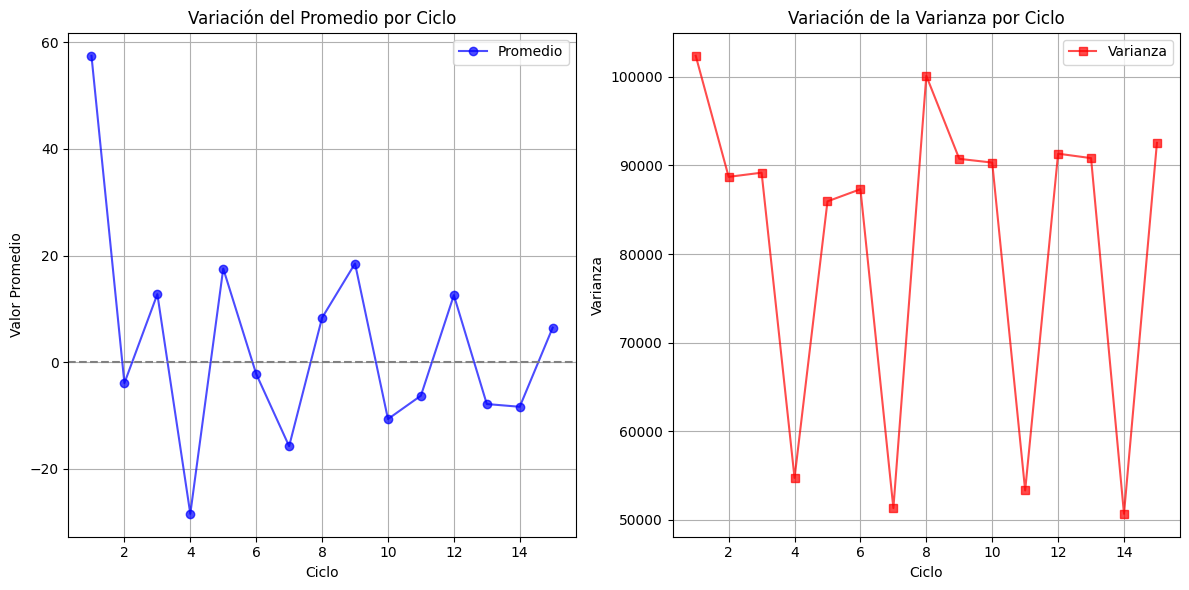

In [ ]:
# Datos de los ciclos
ciclos = np.arange(1, 16)
promedios = np.array([57.498, -3.951, 12.750, -28.483, 17.548, -2.223, -15.791, 8.310, 18.500, -10.695,
                      -6.308, 12.560, -7.877, -8.392, 6.469])
varianzas = np.array([102395, 88715, 89186, 54710, 85948, 87320, 51303, 100125, 90749, 90327,
                      53295, 91333, 90830, 50656, 92558])

# Crear figura
plt.figure(figsize=(12, 6))

#Promedio de cada ciclo
plt.subplot(1, 2, 1)
plt.plot(ciclos, promedios, marker='o', linestyle='-', color='b', label='Promedio', alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Ciclo")
plt.ylabel("Valor Promedio")
plt.title("Variación del Promedio por Ciclo")
plt.legend()
plt.grid(True)

#Varianza de cada ciclo
plt.subplot(1, 2, 2)
plt.plot(ciclos, varianzas, marker='s', linestyle='-', color='r', label='Varianza', alpha=0.7)
plt.xlabel("Ciclo")
plt.ylabel("Varianza")
plt.title("Variación de la Varianza por Ciclo")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



Se realizan dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t. Se determina estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente se realiza la prueba t para determinar si existen diferencias entre los ciclos.

Extrayendo ciclos basados en una duración fija de 1500 muestras...
 - Ciclo 5 extraído (índices 6000 a 7499).
 - Ciclo 6 extraído (índices 7500 a 8999).
 - Ciclo 7 extraído (índices 9000 a 10499).
 - Ciclo 8 extraído (índices 10500 a 11999).


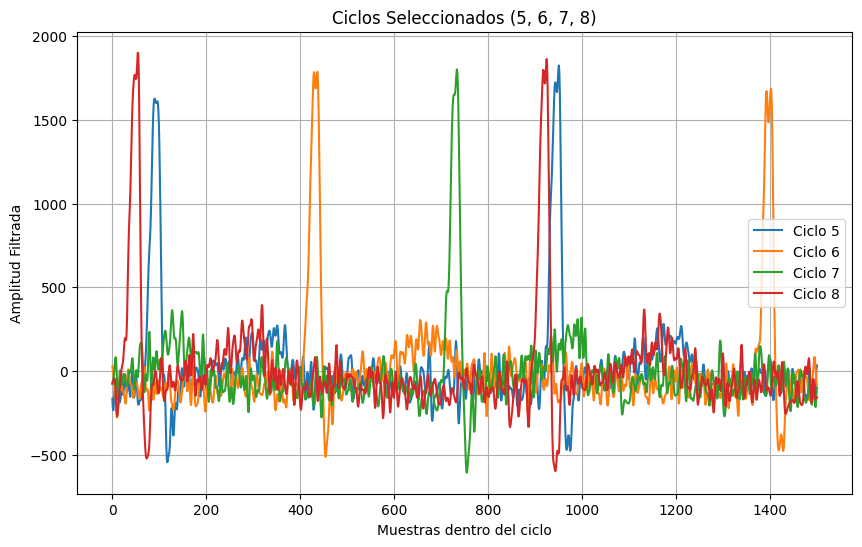


--- 1. Pruebas de Normalidad (Shapiro-Wilk) ---
Ciclo 5: W=0.5616, p-valor = 0.0000 (No Normal)
Ciclo 6: W=0.5363, p-valor = 0.0000 (No Normal)
Ciclo 7: W=0.5956, p-valor = 0.0000 (No Normal)
Ciclo 8: W=0.5632, p-valor = 0.0000 (No Normal)

--- 2. Pruebas de Homocedasticidad (Levene) ---
Ciclo 5 vs Ciclo 6: W=0.1055, p-valor = 0.7453 (Varianzas Iguales)
Ciclo 7 vs Ciclo 8: W=12.5563, p-valor = 0.0004 (Varianzas Diferentes)

--- 3. Comparaciones entre Ciclos (alpha = 0.05) ---

--- Comparación: Ciclo 5 vs Ciclo 6 ---
Condiciones: No Normalidad (en al menos un ciclo) -> Aplicando Prueba U de Mann-Whitney
Resultado: U=1243075.0000, p-valor = 0.0000

--- Comparación: Ciclo 7 vs Ciclo 8 ---
Condiciones: No Normalidad (en al menos un ciclo) -> Aplicando Prueba U de Mann-Whitney
Resultado: U=1112114.0000, p-valor = 0.5870


In [ ]:
indices_ciclos_a_extraer = [4, 5, 6, 7]

# Diccionario para guardar los datos de los ciclos extraídos
ciclos_seleccionados = {}

# --- Extracción de los ciclos específicos ---
print(f"Extrayendo ciclos basados en una duración fija de {ciclo_duracion_muestras} muestras...")
signal_length = len(ecg_filtered)

for i, ciclo_inicio in enumerate(indices_ciclos_a_extraer):
    # Calcular inicio y fin del ciclo actual
    inicio = ciclo_inicio * ciclo_duracion_muestras
    final =inicio + ciclo_duracion_muestras

    # Extraer y guardar los datos del ciclo
    nombre_variable = f"ciclo_{ciclo_inicio + 1}" # e.g., 'ciclo_5'
    ciclos_seleccionados[nombre_variable] = ecg_filtered[inicio:final]
    print(f" - Ciclo {ciclo_inicio + 1} extraído (índices {inicio} a {final-1}).")

# Asignar a variables individuales para usar en las pruebas (más legible)
ciclo_5 = ciclos_seleccionados['ciclo_5']
ciclo_6 = ciclos_seleccionados['ciclo_6']
ciclo_7 = ciclos_seleccionados['ciclo_7']
ciclo_8 = ciclos_seleccionados['ciclo_8']

# --- Visualización Opcional de los Ciclos Seleccionados ---
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(ciclo_5)), ciclo_5, label='Ciclo 5')
plt.plot(np.arange(len(ciclo_6)), ciclo_6, label='Ciclo 6')
plt.plot(np.arange(len(ciclo_7)), ciclo_7, label='Ciclo 7')
plt.plot(np.arange(len(ciclo_8)), ciclo_8, label='Ciclo 8')
plt.title('Ciclos Seleccionados (5, 6, 7, 8)')
plt.xlabel('Muestras dentro del ciclo')
plt.ylabel('Amplitud Filtrada')
plt.legend()
plt.grid(True)
plt.show()

# --- Pruebas Estadísticas ---
alpha = 0.05 # Nivel de significancia

# Pruebas de Normalidad (Shapiro-Wilk)
print("\n--- 1. Pruebas de Normalidad (Shapiro-Wilk) ---")
shapiro_5 = shapiro(ciclo_5)
shapiro_6 = shapiro(ciclo_6)
shapiro_7 = shapiro(ciclo_7)
shapiro_8 = shapiro(ciclo_8)

print(f"Ciclo 5: W={shapiro_5.statistic:.4f}, p-valor = {shapiro_5.pvalue:.4f} {'(Normal)' if shapiro_5.pvalue > alpha else '(No Normal)'}")
print(f"Ciclo 6: W={shapiro_6.statistic:.4f}, p-valor = {shapiro_6.pvalue:.4f} {'(Normal)' if shapiro_6.pvalue > alpha else '(No Normal)'}")
print(f"Ciclo 7: W={shapiro_7.statistic:.4f}, p-valor = {shapiro_7.pvalue:.4f} {'(Normal)' if shapiro_7.pvalue > alpha else '(No Normal)'}")
print(f"Ciclo 8: W={shapiro_8.statistic:.4f}, p-valor = {shapiro_8.pvalue:.4f} {'(Normal)' if shapiro_8.pvalue > alpha else '(No Normal)'}")

# Pruebas de Homocedasticidad (Levene)
print("\n--- 2. Pruebas de Homocedasticidad (Levene) ---")
levene_5_vs_6 = levene(ciclo_5, ciclo_6)
levene_7_vs_8 = levene(ciclo_7, ciclo_8) # Prueba separada para el otro par

print(f"Ciclo 5 vs Ciclo 6: W={levene_5_vs_6.statistic:.4f}, p-valor = {levene_5_vs_6.pvalue:.4f} {'(Varianzas Iguales)' if levene_5_vs_6.pvalue > alpha else '(Varianzas Diferentes)'}")
print(f"Ciclo 7 vs Ciclo 8: W={levene_7_vs_8.statistic:.4f}, p-valor = {levene_7_vs_8.pvalue:.4f} {'(Varianzas Iguales)' if levene_7_vs_8.pvalue > alpha else '(Varianzas Diferentes)'}")

# Comparaciones entre ciclos
print("\n--- 3. Comparaciones entre Ciclos (alpha = 0.05) ---")

# Comparación 1: Ciclo 5 vs Ciclo 6
print("\n--- Comparación: Ciclo 5 vs Ciclo 6 ---")
normal_5 = shapiro_5.pvalue > alpha
normal_6 = shapiro_6.pvalue > alpha
homocedastico_5_6 = levene_5_vs_6.pvalue > alpha

if normal_5 and normal_6:
    if homocedastico_5_6:
        # Normalidad y Homocedasticidad -> t-test estándar
        t_test_result = ttest_ind(ciclo_5, ciclo_6, equal_var=True)
        print("Condiciones: Normalidad y Varianzas Iguales -> Aplicando Prueba t estándar")
        print(f"Resultado: t={t_test_result.statistic:.4f}, p-valor = {t_test_result.pvalue:.4f}")
    else:
        # Normalidad pero NO Homocedasticidad -> t-test de Welch
        t_test_result = ttest_ind(ciclo_5, ciclo_6, equal_var=False)
        print("Condiciones: Normalidad y Varianzas Diferentes -> Aplicando Prueba t de Welch")
        print(f"Resultado: t={t_test_result.statistic:.4f}, p-valor = {t_test_result.pvalue:.4f}")
else:
    # No Normalidad (en uno o ambos) -> Mann-Whitney U
    mannwhitney_result = mannwhitneyu(ciclo_5, ciclo_6, alternative='two-sided')
    print("Condiciones: No Normalidad (en al menos un ciclo) -> Aplicando Prueba U de Mann-Whitney")
    print(f"Resultado: U={mannwhitney_result.statistic:.4f}, p-valor = {mannwhitney_result.pvalue:.4f}")

# Comparación 2: Ciclo 7 vs Ciclo 8
print("\n--- Comparación: Ciclo 7 vs Ciclo 8 ---")
normal_7 = shapiro_7.pvalue > alpha
normal_8 = shapiro_8.pvalue > alpha
homocedastico_7_8 = levene_7_vs_8.pvalue > alpha

if normal_7 and normal_8:
    if homocedastico_7_8:
        # Normalidad y Homocedasticidad -> t-test estándar
        t_test_result = ttest_ind(ciclo_7, ciclo_8, equal_var=True)
        print("Condiciones: Normalidad y Varianzas Iguales -> Aplicando Prueba t estándar")
        print(f"Resultado: t={t_test_result.statistic:.4f}, p-valor = {t_test_result.pvalue:.4f}")
    else:
        # Normalidad pero NO Homocedasticidad -> t-test de Welch
        t_test_result = ttest_ind(ciclo_7, ciclo_8, equal_var=False)
        print("Condiciones: Normalidad y Varianzas Diferentes -> Aplicando Prueba t de Welch")
        print(f"Resultado: t={t_test_result.statistic:.4f}, p-valor = {t_test_result.pvalue:.4f}")
else:
    # No Normalidad (en uno o ambos) -> Mann-Whitney U
    mannwhitney_result = mannwhitneyu(ciclo_7, ciclo_8, alternative='two-sided')
    print("Condiciones: No Normalidad (en al menos un ciclo) -> Aplicando Prueba U de Mann-Whitney")
    print(f"Resultado: U={mannwhitney_result.statistic:.4f}, p-valor = {mannwhitney_result.pvalue:.4f}")

**Pruebas de Normalidad (Shapiro-Wilk)**
Para los cuatro ciclos (5, 6, 7 y 8), el p-valor es 0.0000, dado que el p-valor es mucho menor que el nivel de significancia estándar (α = 0.05), se rechaza la hipótesis nula de normalidad para todos los ciclos. Por lo que ninguno de los ciclos analizados sigue una distribución normal. Esto es esperado para señales ECG, que tienen estructuras muy definidas y no suelen distribuirse normalmente.
Debido a la falta de normalidad, la prueba t de Student no es apropiada para comparar estos ciclos. Se debe usar una prueba no paramétrica.


**Pruebas de Homocedasticidad (Levene)**
(Ciclo 5 vs Ciclo 6): p-valor = 0.7453. Debido a que p > 0.05. No se rechaza la hipótesis nula. No hay evidencia estadística suficiente para decir que las varianzas de los ciclos 5 y 6 son diferentes. Se asumen iguales

(Ciclo 7 vs Ciclo 8): p-valor = 0.0004.Debido a que p < 0.05. Se rechaza la hipótesis nula. Hay evidencia estadística para decir que las varianzas de los ciclos 7 y 8 son diferentes (heterocedasticidad).

La igualdad de varianzas no se mantiene constante entre todos los pares de ciclos, lo que ya es un indicio en contra de la estacionariedad.

**Comparaciones entre Ciclos (Mann-Whitney U)**
Se eligió la prueba U de Mann-Whitney, que es la alternativa no paramétrica a la prueba t para muestras independientes, adecuada cuando no se cumple el supuesto de normalidad.

Comparación 1 (Ciclo 5 vs Ciclo 6):
Resultado: p-valor = 0.0000. p < 0.05. Se rechaza la hipótesis nula de que las distribuciones son iguales. Es decir, existe una diferencia estadísticamente significativa entre el Ciclo 5 y el Ciclo 6.

Comparación 2 (Ciclo 7 vs Ciclo 8):
Resultado: p-valor = 0.5870. p > 0.05. No se rechaza la hipótesis nula. Es decir, no hay evidencia estadística suficiente para afirmar que exista una diferencia entre las distribuciones del Ciclo 7 y el Ciclo 8. Son estadísticamente indistinguibles con esta prueba.

**Conclusión:**
 El hecho de que se haya encontrado una diferencia significativa entre al menos un par de ciclos (Ciclo 5 vs Ciclo 6) es una fuerte evidencia en contra de la hipótesis de estacionariedad de la señal ECG en este segmento. Si la señal fuera estacionaria, esperaríamos que todos los ciclos provinieran de la misma distribución y, por lo tanto, las pruebas de comparación no deberían encontrar diferencias significativas.

Por último, se comprueban los resultados anteriores aplicando una prueba de Dickey-Fuller a la señal (Estacionariedad)

In [ ]:
archivo = scipy.io.loadmat('signals.mat')

# Extraer la señal ECG filtrada
ecg_filtered = archivo['ECG_filtered'].flatten()  # Señal ECG filtrada

# Realizar la prueba de Dickey-Fuller sobre toda la señal de ECG Filtrada
resultado_adf = adfuller(ecg_filtered)

# Mostrar los resultados
print('Estadistico:', resultado_adf[0])
print('p-valor:', resultado_adf[1])
print('Valores críticos:')
for key, value in resultado_adf[4].items():
    print(f'{key}: {value}')

Estadistico: -24.134106752075187
p-valor: 0.0
Valores críticos:
1%: -3.4305630243276717
5%: -2.861634151073544
10%: -2.5668201137295887


La prueba de Dickey-Fuller aplicada a la señal de ECG filtrada arrojó un estadístico ADF de -24.1341 y un p-valor de 0.0, lo que indica una evidencia  clara de estacionariedad, ya que el valor del estadístico es mucho más negativo que cualquier valor crítico, y con el p-valor prácticamente nulo indica que la probabilidad de que la señal tenga una raíz unitaria, es despreciable.

Aunque la señal muestra diferencias entre algunos ciclos (como se evidenció en la prueba U de Mann-Whitney), la prueba de Dickey-Fuller analiza la señal completa, buscando la presencia de tendencias generales o fluctuaciones persistentes, en este caso puede ser que la señal sea globalmente estacionaria, pero con variaciones locales o fluctuaciones pequeñas que provocan esas diferencias entre ciclos.

Por lo tanto, la señal se comporta como estacionaria a nivel macroscópico (según ADF), pero las diferencias locales entre ciclos, posiblemente por ruido o variaciones fisiológicas menores, siguen siendo detectables en comparaciones más específicas.